# Recorte 1985 - 2002 -> Estratégia

In [1]:
# Importando bibliotecas necessárias para a construção de grafos
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
import pandas as pd
import numpy as np
import csv
import ast
import cpnet
from graph_tool import spectral
import seaborn as sns
import regression as reg
import cpnet

from scipy import stats
from matplotlib import pyplot as plt
from graph_tool import centrality
from graph_tool import spectral

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/usr/local/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1582: PendingDeprecationWarning: The register_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1583: PendingDeprecationWarning: The register_cmap function will b

In [2]:
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
df.dropna(subset=['Publisher'], inplace=True)
df = df.loc[~df['Critic_Score'].isna() & ~df['User_Score'].isna() & ~df['Rating'].isna()]

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [4]:
df_recortado = df.loc[(df['Year_of_Release'] >= 1985) & (df['Year_of_Release'] <= 2002) & (df['Genre'] == 'Strategy')] 

In [5]:
df_recortado.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1128,Pikmin,GC,2001.0,Strategy,Nintendo,0.78,0.25,0.56,0.04,1.63,89.0,39.0,8.7,121.0,Nintendo,E
1597,RollerCoaster Tycoon 2,PC,2002.0,Strategy,Atari,1.19,0.05,0.00,0.00,1.25,74.0,22.0,8.5,135.0,Chris Sawyer,E
2172,Kessen,PS2,2000.0,Strategy,Electronic Arts,0.27,0.21,0.41,0.07,0.95,75.0,20.0,8.4,12.0,Koei,T
2919,Advance Wars,GBA,2001.0,Strategy,Nintendo,0.50,0.19,0.00,0.01,0.70,92.0,28.0,9.0,95.0,Intelligent Systems,E
4111,Theme Park Roller Coaster,PS2,2000.0,Strategy,Electronic Arts,0.23,0.18,0.00,0.06,0.48,82.0,11.0,7.9,17.0,Bullfrog Productions,E


In [6]:
df_recortado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1128 to 16210
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             31 non-null     object 
 1   Platform         31 non-null     object 
 2   Year_of_Release  31 non-null     float64
 3   Genre            31 non-null     object 
 4   Publisher        31 non-null     object 
 5   NA_Sales         31 non-null     float64
 6   EU_Sales         31 non-null     float64
 7   JP_Sales         31 non-null     float64
 8   Other_Sales      31 non-null     float64
 9   Global_Sales     31 non-null     float64
 10  Critic_Score     31 non-null     float64
 11  Critic_Count     31 non-null     float64
 12  User_Score       31 non-null     float64
 13  User_Count       31 non-null     float64
 14  Developer        31 non-null     object 
 15  Rating           31 non-null     object 
dtypes: float64(10), object(6)
memory usage: 4.1+ KB


In [7]:
df_recortado.Year_of_Release.value_counts()

2002.0    12
2001.0     8
2000.0     5
1999.0     3
1998.0     3
Name: Year_of_Release, dtype: int64

In [8]:
publishers = df_recortado["Publisher"].unique()

In [9]:
sixth_console_generation_strategy_graph = Graph(directed=False) # não-dirigido
sixth_console_generation_strategy_graph.add_vp('Publisher')
sixth_console_generation_strategy_graph.add_vp('Games_released')
sixth_console_generation_strategy_graph.add_ep('strength')

for pub in publishers:
    sixth_console_generation_strategy_graph.add_vertex(pub)
    sixth_console_generation_strategy_graph.get_vertex(pub)['Publisher'] = pub
    num_games = df_recortado['Name'].loc[df_recortado["Publisher"] == pub].nunique() 
    sixth_console_generation_strategy_graph.get_vertex(pub)['Games_released'] = num_games

In [10]:
sorted_years = list(range(1985, 2003))
print(sorted_years)

[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]


In [11]:
df_list = []

margem = 4
for i in range(0, len(sorted_years), margem):
    df_list.append(df_recortado[df_recortado['Year_of_Release'].isin(sorted_years[i:i+margem])])

In [12]:
publisher_platforms = []
for db in df_list:
    publisher_platforms.append(db.groupby('Platform')['Publisher'].unique().to_dict())

In [13]:
for platform_dict in publisher_platforms:
    for platform, publishers in platform_dict.items():
        for i in range(len(publishers)):
            if i != len(publishers)-1:
                next_vertex = i+1
                while(next_vertex < len(publishers)):
                    if(publishers[i] != publishers[next_vertex] and not sixth_console_generation_strategy_graph.has_edge(publishers[i], publishers[next_vertex])):
                        sixth_console_generation_strategy_graph.add_edge(publishers[i], publishers[next_vertex])
                        sixth_console_generation_strategy_graph.get_edge(publishers[i], publishers[next_vertex])['strength'] = 1
                        next_vertex += 1
                    else:
                        sixth_console_generation_strategy_graph.get_edge(publishers[i], publishers[next_vertex])['strength'] += 1
                        next_vertex += 1

In [14]:
print('número de vértices de g:', sixth_console_generation_strategy_graph.num_vertices())

número de vértices de g: 20


In [15]:
print('número de arestaas de g:', sixth_console_generation_strategy_graph.num_edges())

número de arestaas de g: 47


In [16]:
gt_save(sixth_console_generation_strategy_graph, 'sixth_console_generation_strategy_graph.net.gz')

In [17]:
g = gt_load('sixth_console_generation_strategy_graph.net.gz')
g = gt_clean(g)
cc = centrality.closeness(g)
g.add_vp('closeness', cc)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'sixth_console_generation_strategy_sfdp.net.gz')

# Análise

# Proximidade X Sucesso

In [18]:
df_pro_suc = df_recortado.copy()

In [19]:
g = gt_load("sixth_console_generation_strategy_sfdp.net.gz")

In [20]:
data = gt_data(g)
data.drop('Games_released', axis=1, inplace=True)
data.head()

,Publisher,closeness
id,,
Electronic Arts,Electronic Arts,0.555556
THQ,THQ,0.666667
Tecmo Koei,Tecmo Koei,1.000000
Ubisoft,Ubisoft,0.666667
Eidos Interactive,Eidos Interactive,0.666667


In [21]:
df_pro_suc = pd.merge(df_pro_suc, data, on = "Publisher", how = "inner")
df_pro_suc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17 non-null     object 
 1   Platform         17 non-null     object 
 2   Year_of_Release  17 non-null     float64
 3   Genre            17 non-null     object 
 4   Publisher        17 non-null     object 
 5   NA_Sales         17 non-null     float64
 6   EU_Sales         17 non-null     float64
 7   JP_Sales         17 non-null     float64
 8   Other_Sales      17 non-null     float64
 9   Global_Sales     17 non-null     float64
 10  Critic_Score     17 non-null     float64
 11  Critic_Count     17 non-null     float64
 12  User_Score       17 non-null     float64
 13  User_Count       17 non-null     float64
 14  Developer        17 non-null     object 
 15  Rating           17 non-null     object 
 16  closeness        17 non-null     float64
dtypes: float64(11), ob

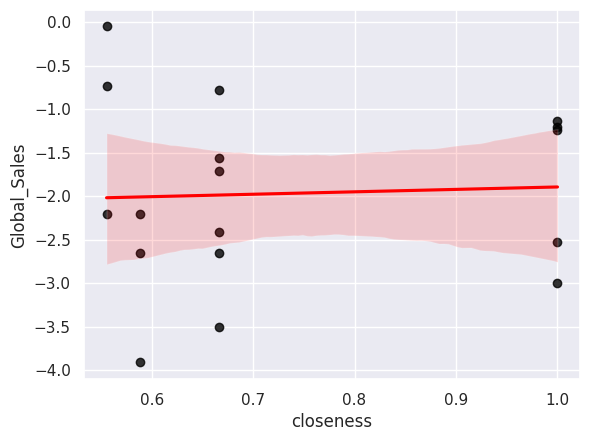

In [22]:
sns.regplot(x=df_pro_suc['closeness'], y=np.log(df_pro_suc['Global_Sales']), scatter_kws={"color": "black"}, line_kws={"color": "red"});

In [23]:
result = reg.linear(data=df_pro_suc, formula='np.log(Global_Sales) ~ closeness')

In [24]:
result.nano_summary()

+0.279 (1.465)


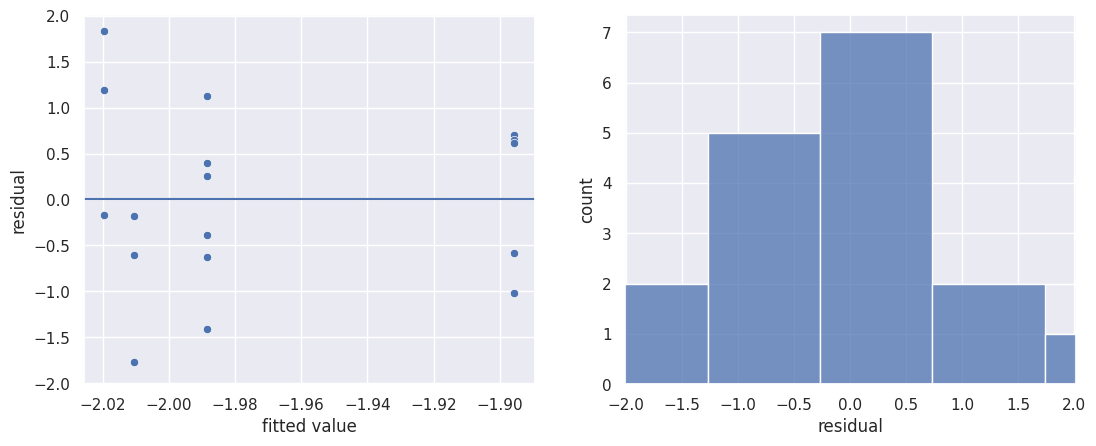

In [25]:
result.plot_residuals()